In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes charts visible in notebook
%matplotlib inline

print("Libraries imported successfully")


Libraries imported successfully


In [8]:
# Step 2: Load Dataset

df = pd.read_excel(r"C:\Users\hp\Downloads\Tech_Sales.xlsx")

# Show first 5 rows
df.head()


,Transaction ID,Product,Quantity,Unit Price (INR),Date,Customer Name,State,Country,Sales Channel,Payment Type,Sales
0,TX0001,Smartwatch,9,8941,2024-04-12,Vivaan Sastry,Arunachal Pradesh,India,Store,Credit Card,80469
1,TX0002,Desktop PC,9,19827,2024-02-06,Ishaan Madan,Odisha,India,Store,Credit Card,178443
2,TX0003,Desktop PC,4,16640,2023-12-16,Azad Sandhu,Bihar,India,Online,Credit Card,66560
3,TX0004,E-Reader,3,2945,2024-09-11,Shray Chawla,Manipur,India,Online,Credit Card,8835
4,TX0005,Laptop,4,2848,2023-10-24,Zara Kata,Madhya Pradesh,India,Direct,Net Banking,11392


In [13]:
# No. of rows and columns
df.shape

(1000, 11)

In [12]:
# Names of columns
df.columns

Index(['Transaction ID', 'Product', 'Quantity', 'Unit Price (INR)', 'Date',
       'Customer Name', 'State', 'Country', 'Sales Channel', 'Payment Type',
       'Sales'],
      dtype='object')

In [15]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   object
 1   Product           1000 non-null   object
 2   Quantity          1000 non-null   int64 
 3   Unit Price (INR)  1000 non-null   int64 
 4   Date              1000 non-null   object
 5   Customer Name     1000 non-null   object
 6   State             1000 non-null   object
 7   Country           1000 non-null   object
 8   Sales Channel     1000 non-null   object
 9   Payment Type      1000 non-null   object
 10  Sales             1000 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [17]:
df.describe()


,Quantity,Unit Price (INR),Sales
count,1000.000000,1000.000000,1000.00000
mean,4.899000,10509.633000,51202.11700
std,2.540719,5241.520851,38852.61529
min,1.000000,2040.000000,2043.00000
25%,3.000000,5962.000000,20152.50000
50%,5.000000,10208.000000,39636.50000
75%,7.000000,14846.000000,74091.00000
max,9.000000,19994.000000,178443.00000


In [19]:
# Check missing values
df.isnull().sum()

Transaction ID      0
Product             0
Quantity            0
Unit Price (INR)    0
Date                0
Customer Name       0
State               0
Country             0
Sales Channel       0
Payment Type        0
Sales               0
dtype: int64

In [20]:
# Check duplicate rows
df.duplicated().sum()


np.int64(0)

In [21]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   object        
 1   Product           1000 non-null   object        
 2   Quantity          1000 non-null   int64         
 3   Unit Price (INR)  1000 non-null   int64         
 4   Date              1000 non-null   datetime64[ns]
 5   Customer Name     1000 non-null   object        
 6   State             1000 non-null   object        
 7   Country           1000 non-null   object        
 8   Sales Channel     1000 non-null   object        
 9   Payment Type      1000 non-null   object        
 10  Sales             1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 86.1+ KB


In [25]:
# Create Year column
df['Year'] = df['Date'].dt.year

# Create Month column
df['Month'] = df['Date'].dt.month

# Create Month Name column
df['Month_Name'] = df['Date'].dt.month_name()

# Check
df.head()


,Transaction ID,Product,Quantity,Unit Price (INR),Date,Customer Name,State,Country,Sales Channel,Payment Type,Sales,Year,Month,Month_Name
0,TX0001,Smartwatch,9,8941,2024-04-12,Vivaan Sastry,Arunachal Pradesh,India,Store,Credit Card,80469,2024,4,April
1,TX0002,Desktop PC,9,19827,2024-02-06,Ishaan Madan,Odisha,India,Store,Credit Card,178443,2024,2,February
2,TX0003,Desktop PC,4,16640,2023-12-16,Azad Sandhu,Bihar,India,Online,Credit Card,66560,2023,12,December
3,TX0004,E-Reader,3,2945,2024-09-11,Shray Chawla,Manipur,India,Online,Credit Card,8835,2024,9,September
4,TX0005,Laptop,4,2848,2023-10-24,Zara Kata,Madhya Pradesh,India,Direct,Net Banking,11392,2023,10,October


In [26]:
# Verify Sales = Quantity * Unit Price
df['Calculated_Sales'] = df['Quantity'] * df['Unit Price (INR)']

# Check difference
(df['Sales'] - df['Calculated_Sales']).sum()


np.int64(0)

In [27]:
df.shape

(1000, 15)

In [29]:
df.columns

Index(['Transaction ID', 'Product', 'Quantity', 'Unit Price (INR)', 'Date',
       'Customer Name', 'State', 'Country', 'Sales Channel', 'Payment Type',
       'Sales', 'Year', 'Month', 'Month_Name', 'Calculated_Sales'],
      dtype='object')

In [30]:
# Total Sales
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)


Total Sales: 51202117


In [31]:
# Total quantity
total_quantity = df['Quantity'].sum()
print("Total Quantity Sold:", total_quantity)


Total Quantity Sold: 4899


In [32]:
# Total no. of transections
total_transactions = df['Transaction ID'].count()
print("Total Transactions:", total_transactions)


Total Transactions: 1000


In [33]:
# Top 5 products by sales
df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head()


Product
External Hard Drive    5758590
Printer                5546024
Smartphone             5345422
Desktop PC             5217319
Smartwatch             5192638
Name: Sales, dtype: int64

In [34]:
# Sales by state
df.groupby('State')['Sales'].sum().sort_values(ascending=False)


State
Telangana            2485106
Jharkhand            2369657
Assam                2336202
Chhattisgarh         2327912
Manipur              2287237
Tamil Nadu           2285125
Kerala               2105939
Uttarakhand          2103414
Gujarat              2005827
Arunachal Pradesh    2003161
Punjab               1982025
Odisha               1937488
Nagaland             1933057
Sikkim               1902753
Himachal Pradesh     1822363
West Bengal          1795464
Meghalaya            1710873
Tripura              1682846
Karnataka            1674656
Haryana              1621117
Uttar Pradesh        1520672
Andhra Pradesh       1519681
Mizoram              1457875
Rajasthan            1354795
Maharashtra          1283803
Goa                  1277871
Bihar                1271799
Madhya Pradesh       1143399
Name: Sales, dtype: int64

In [35]:
# Sales by sales channels
df.groupby('Sales Channel')['Sales'].sum()


Sales Channel
Direct    15409758
Online    17385072
Store     18407287
Name: Sales, dtype: int64

In [36]:
# Sales by payment type
df.groupby('Payment Type')['Sales'].sum()


Payment Type
Cash           10886530
Credit Card    10460781
Debit Card      9090654
Net Banking    10111186
UPI            10652966
Name: Sales, dtype: int64

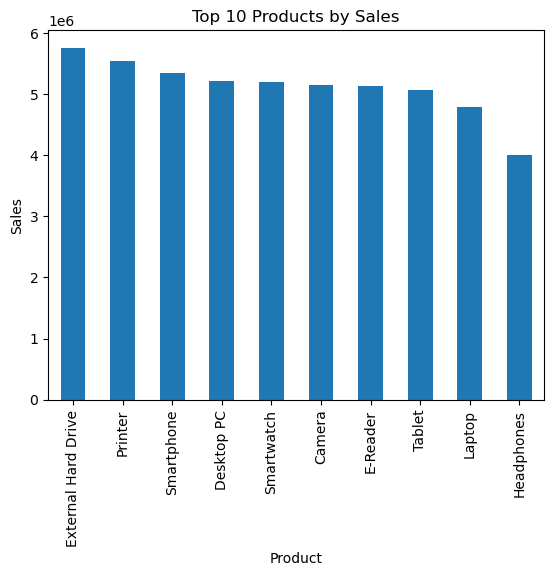

In [40]:
# Top 10 products by sales


top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()


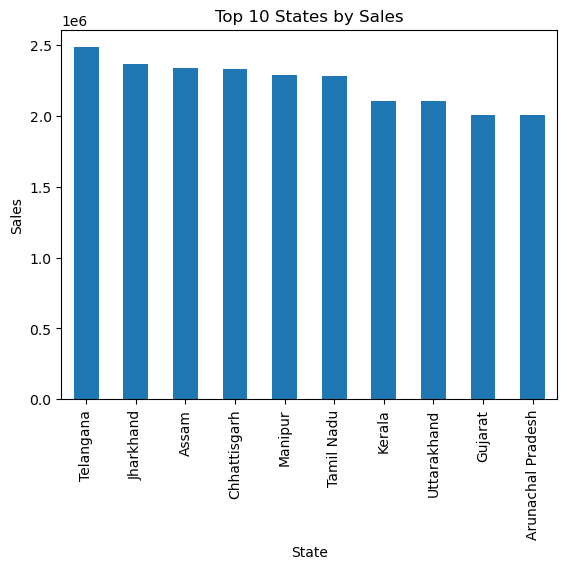

In [41]:
# Top 10 states by sales

top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_states.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()


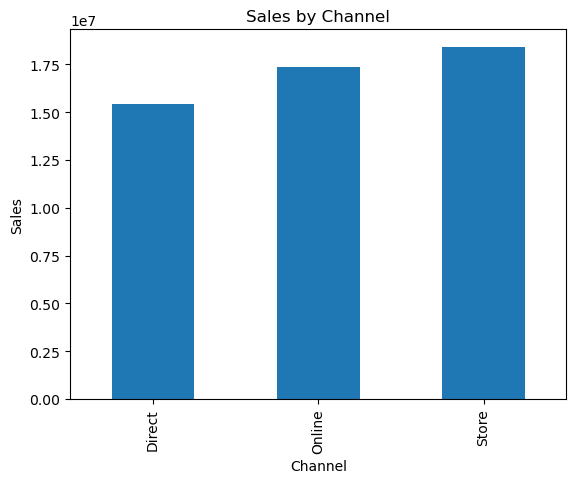

In [43]:
# Sales by channel

channel_sales = df.groupby('Sales Channel')['Sales'].sum()

plt.figure()
channel_sales.plot(kind='bar')
plt.title("Sales by Channel")
plt.xlabel("Channel")
plt.ylabel("Sales")
plt.show()


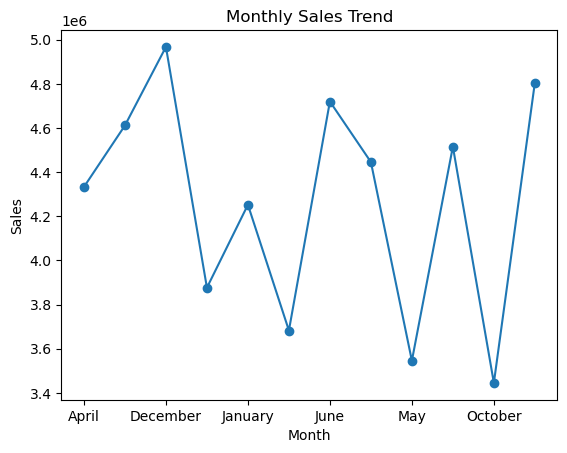

In [44]:
# Monthly sales trend

monthly_sales = df.groupby('Month_Name')['Sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [46]:
# Export cleaned dataset to Excel
df.to_excel("Cleaned_Tech_Sales_Data.xlsx", index=False)

print("Cleaned dataset exported successfully")


Cleaned dataset exported successfully


In [47]:
import os
print(os.getcwd())


C:\Users\hp
